In [2]:
# We need pandas to work with .csv, dabl for choose the model and fit()

import pandas as pd
import dabl

In [32]:
# We do not need matplotlib cause sklearn and dabl have a plot() funcs.

from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [22]:
# Import and read the data
train_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')

In [1]:
train_data.head(20)

NameError: name 'train_data' is not defined

In [23]:
test_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
# Getting rid of empty values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\dabl\plot\supervised.py:545: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like classification
Linear Discriminant Analysis training set score: 0.589


C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\GoDoVoReZ\Anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


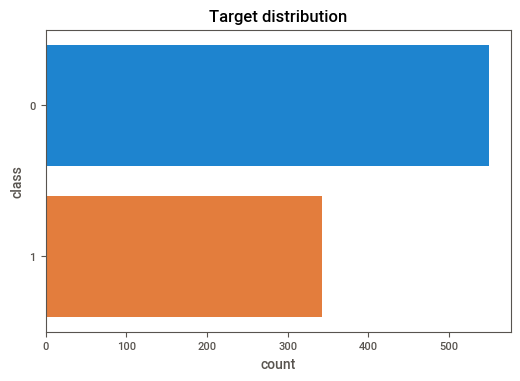

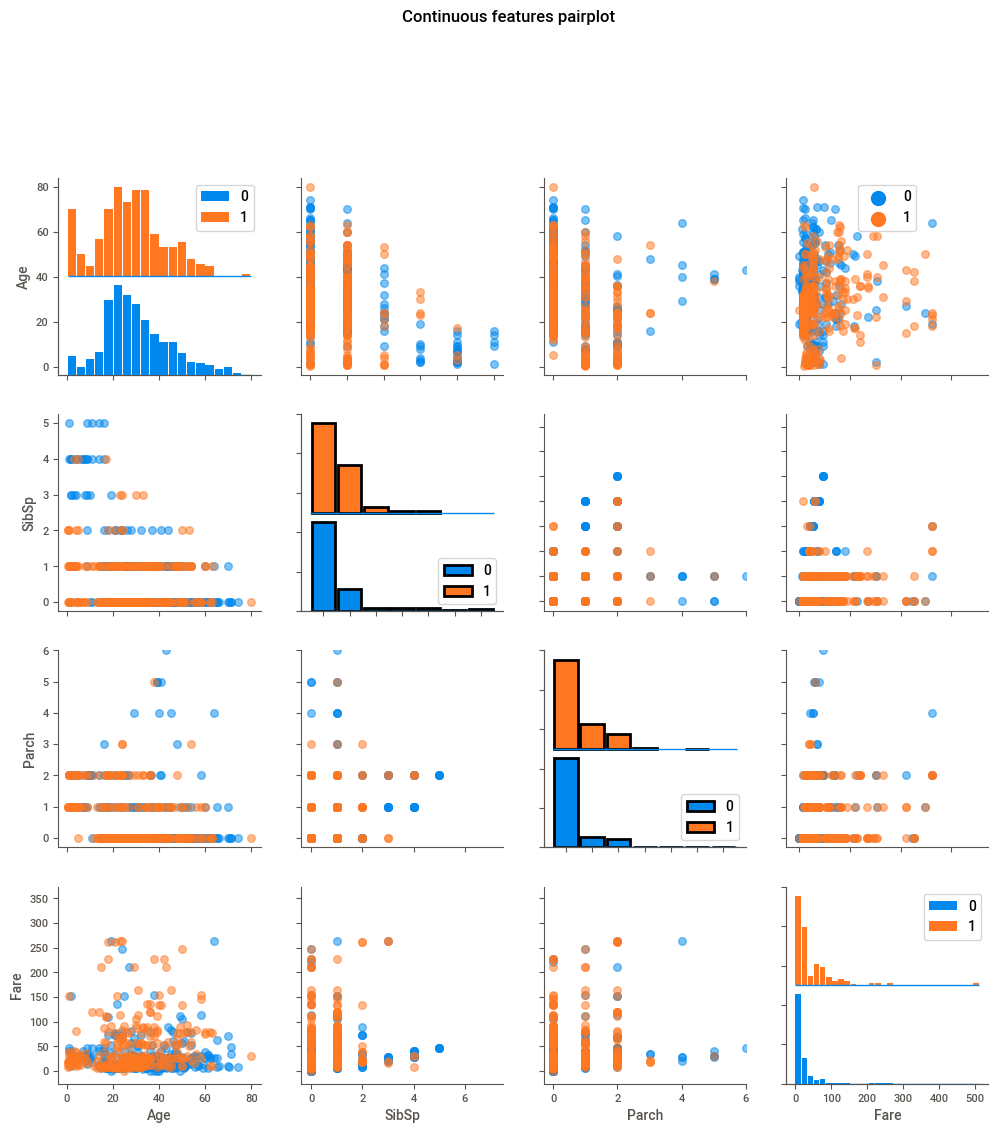

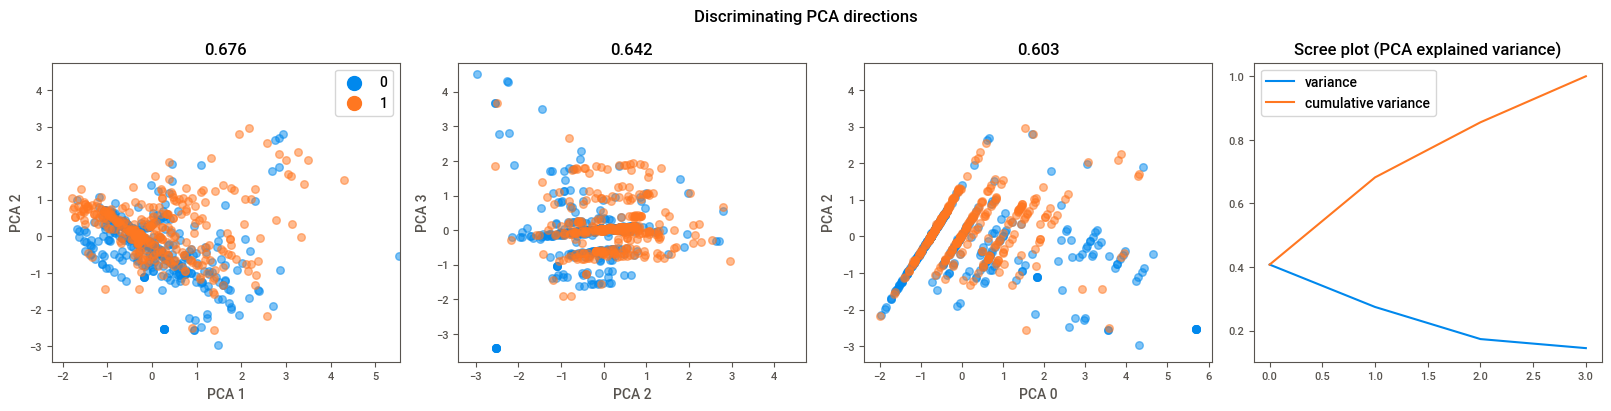

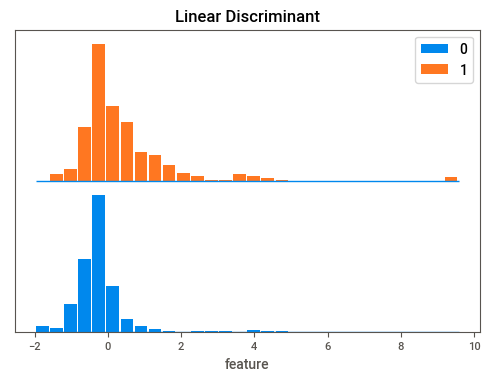

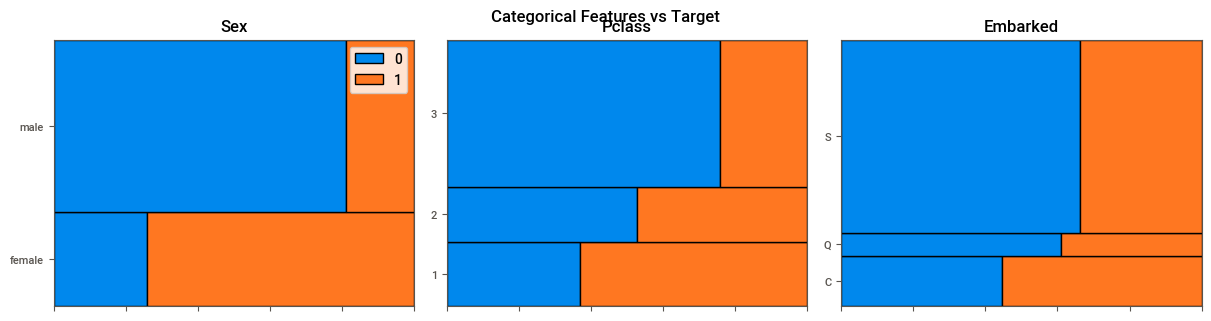

In [21]:
#We don't need to prepare the data. The dabl.plot () function will do everything by itself.
dabl.plot(train_data, 'Survived')

In [25]:
# Prepare train data
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [26]:
clf = dabl.AnyClassifier().fit(X,y)

best classifier:  HistGradientBoostingClassifier()
best score: 0.802


In [29]:
Y_pred = clf.predict(X)
Y_true = y

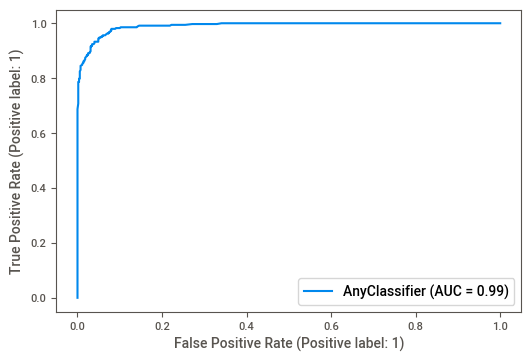

In [30]:
plot_roc_curve(clf, X, y)

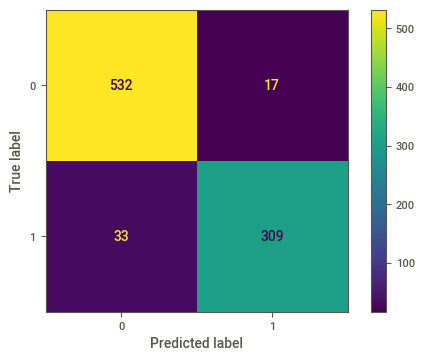

In [31]:
plot_confusion_matrix(clf, X, y)

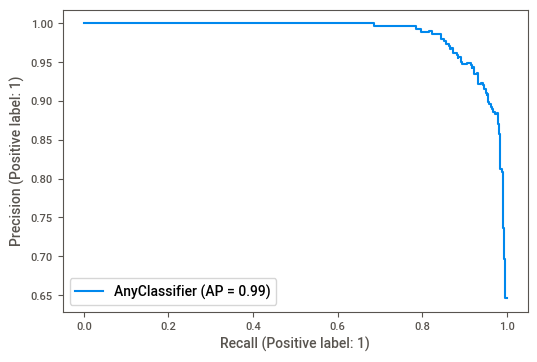

In [33]:
plot_precision_recall_curve(clf, X, y)

In [34]:
clf.score(X, y)

0.9438832772166106

In [48]:
X_test = test_data
y_test = clf.predict(X_test)

In [49]:
clf.score(X_test, y_test)

1.0

In [61]:

# Pack results into .csv file
y_predicted = pd.DataFrame({'PassengerID':X_test['PassengerId'], 'Survived': y_test})

In [62]:
y_predicted

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
y_predicted.to_csv('submission.csv', index=False)